# Cito toets
### Patrick Michel Pierre

# Onderzoek

## Bestaat er een verband tussen cito scores en de mate van etniciteit binnen een regio?

# Data

## Bron : CBS

### Beschikbare data

* Etniciteit
* Regionaal
* Verdeling Autochtonen en Allochtonen


# Ruwe data
* Onnodige kolommen
* Vreemde format

<img src='https://github.com/PieInTheSky/DS/blob/master/ruwe%20data.png?raw=true'>

# Opgeschoonde data

<img src='https://github.com/PieInTheSky/DS/blob/master/schone%20data.png?raw=true'>

# Analyses

## Pearson correlatie


In [15]:
import pandas as pd
import numpy as np
%matplotlib inline

cbs = pd.read_excel("Data2.xlsx")
cito = pd.read_excel("scholenoverzicht_0.xls")

def correlation(year, column):
    
    cbs_data = cbs[cbs.Perioden == year].fillna(0)
    if year == 2013:
        cito_data= cito[cito.TOETS_2013 =='cito']
    elif year == 2014:
        cito_data= cito[cito.TOETS_2014 =='cito']

    compdata = pd.pivot_table(cbs_data, index = ["Regionale kerncijfers Nederland"],
                              values = [column], dropna = True)

    cito_prov = pd.pivot_table(cito_data,index=["provincie"], values=['quasicito'], dropna = True)

    result = pd.concat([cito_prov, compdata], axis=1, join='inner')

    graph = result.plot(kind='scatter', marker='s', figsize=(7, 5), x = 'quasicito',
                        y = column, title= 'Ethnicity vs Cito score '+ str(year))

    print 'Pearson Correlation (R)'
    table = result.corr(method = 'pearson')
    
    return table

Pearson Correlation (R)


,quasicito,Totaal allochtonen %
quasicito,1.000000,-0.238895
Totaal allochtonen %,-0.238895,1.000000


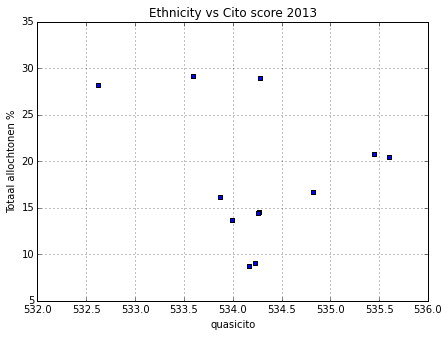

In [16]:
year = 2013

column = 'Totaal allochtonen %'

correlation(year, column)

Pearson Correlation (R)


,quasicito,Autochtonen %
quasicito,1.000000,0.238895
Autochtonen %,0.238895,1.000000


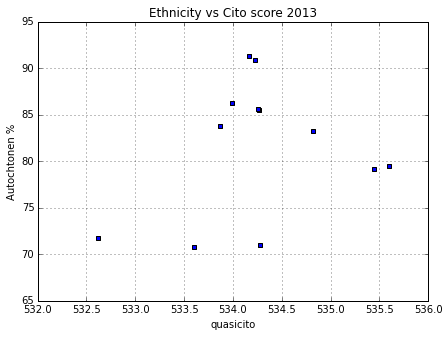

In [17]:
column = 'Autochtonen %'

correlation(year, column)

Pearson Correlation (R)


,quasicito,(Voormalige) Ned. Antillen en Aruba %
quasicito,1.000000,-0.647773
(Voormalige) Ned. Antillen en Aruba %,-0.647773,1.000000


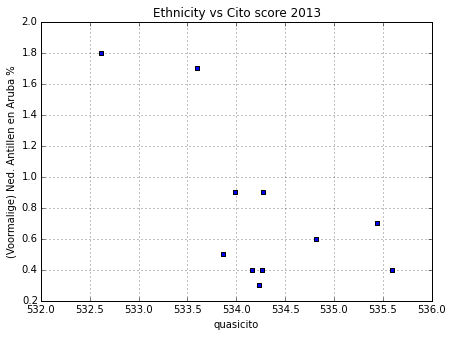

In [18]:
column = '(Voormalige) Ned. Antillen en Aruba %'

correlation(year, column)

Pearson Correlation (R)


,quasicito,Suriname %
quasicito,1.000000,-0.668096
Suriname %,-0.668096,1.000000


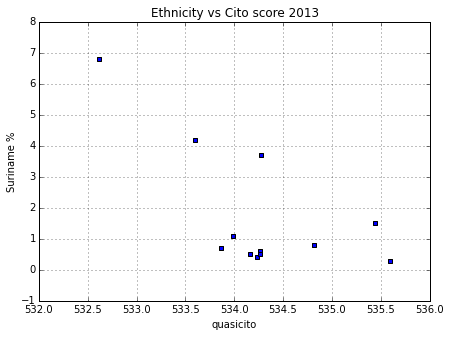

In [19]:
column = 'Suriname %'

correlation(year, column)

# Discussie
* Niet alle basisscholen meegenomen
* Op plaatselijk niveau geen grote correlaties te vinden

# Conclusie

* Provinciaal niveau
* Plaatselijk niveau